<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/Logistic_Regression_Termdeposite_Rev(0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict whether the client has subscribed a term deposit or not using logistic Regression analysis



In [175]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ml_metrics import mse
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import statsmodels.api as sm
print("Libraries Imported!")

Libraries Imported!


In [177]:
# loading csv bank data into dataframe and viewing
df=pd.read_csv("/content/bank-full.csv", sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [178]:
df.shape

(45211, 17)

In [179]:
# Dropping irrelevant columns
df.drop(df.columns[[8,9,10,11,12,13,14,15]],axis=1,inplace=True)
df.rename(columns={'y':'Deposit_Subscribed'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [180]:
df.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   Deposit_Subscribed  45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [182]:
duplicate = df[df.duplicated()]
print("Number of Duplicated rows. :",duplicate.shape)

Number of Duplicated rows. : (3511, 9)


In [183]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(39035, 9)

####Cheecking unknown values in "Job" , " Martial", "Education" columns

In [184]:
df['job'].unique()


array(['management', 'technician', 'blue-collar', 'unknown',
       'entrepreneur', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [185]:
df['marital'].unique()


array(['married', 'single', 'divorced'], dtype=object)

No unknown in Marital column

In [186]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [187]:
# Dropping rows having 'unknown' education and job
df.drop(df[df['job']=='unknown'].index,inplace=True)
df.drop(df[df['education']=='unknown'].index,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,35,management,married,tertiary,no,231,yes,no,no
3,28,management,single,tertiary,no,447,yes,yes,no
4,42,entrepreneur,divorced,tertiary,yes,2,yes,no,no


In [188]:
df.shape

(37201, 9)

In [189]:
df1= df.copy()

Applying label encoder to convert text in to digit

In [190]:
# Applying Label Encoder to all categorical columns
label_encoder=preprocessing.LabelEncoder()
df1['job']= label_encoder.fit_transform(df1['job'])
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['education']= label_encoder.fit_transform(df1['education'])
df1['default']= label_encoder.fit_transform(df1['default'])
df1['housing']= label_encoder.fit_transform(df1['housing'])
df1['loan']= label_encoder.fit_transform(df1['loan'])
df1['Deposit_Subscribed']= label_encoder.fit_transform(df1['Deposit_Subscribed'])

In [191]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,35,4,1,2,0,231,1,0,0
3,28,4,2,2,0,447,1,1,0
4,42,2,0,2,1,2,1,0,0


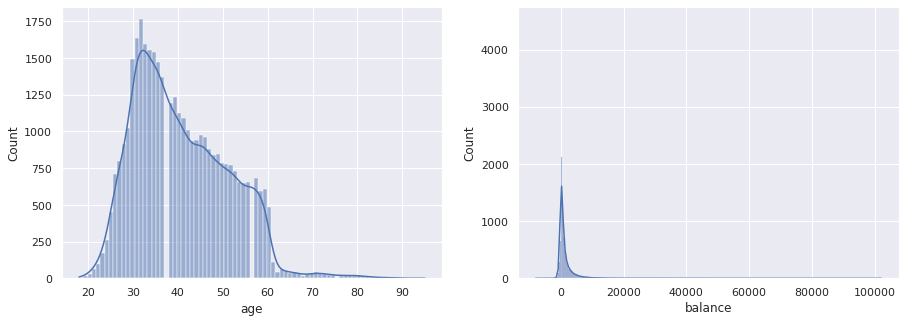

In [192]:
# checking distribution of the two numeric columns-age and balance
sns.set(rc={"figure.figsize": (15,5)})
#creating first plot 
plt.subplot(1,2,1)
ax=sns.histplot(x='age',data=df1,kde=True)
plt.subplot(1,2,2)
sns.histplot(x='balance',data=df1,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


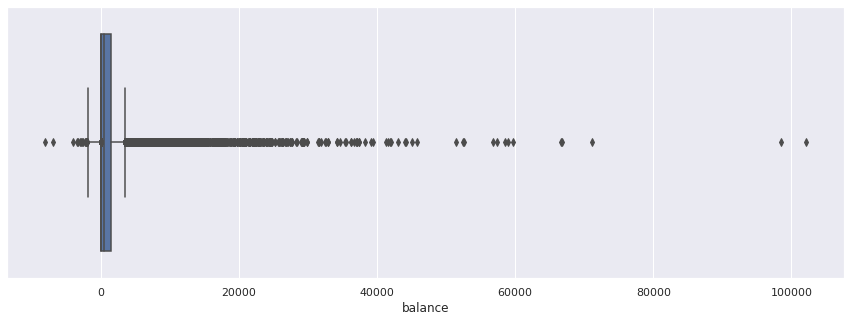

In [193]:
sns.boxplot(df1['age'])
plt.show
sns.boxplot(df1['balance'])
plt.show()

##Check Whether the data is balanced 

In [194]:
# Number of data labelled as 1 in "Deposit Subscibed"
(df1['Deposit_Subscribed']==1).sum()

3962

In [195]:
# Number of data labelled as 0 in "Deposit Subscibed"
(df1['Deposit_Subscribed']==0).sum()

33239

In [196]:
# percent of data labelled as 1(subscribed)
print("Percentage of Deposit subscribed",(df1['Deposit_Subscribed']==1).sum()/df1.shape[0]*100)
print("Percentage of no Deposit subscribed",(df1['Deposit_Subscribed']==0).sum()/df1.shape[0]*100)

Percentage of Deposit subscribed 10.650251337329642
Percentage of no Deposit subscribed 89.34974866267036


Output variable has 10.65% data with value 1 and 89.34 % data with value 0. So the data is biased

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


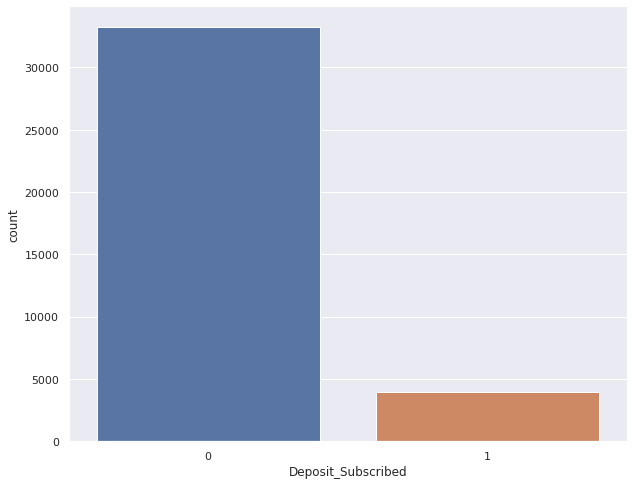

In [197]:
# Exploring output variable(Y) 
plt.figure(figsize=(10,8))
sns.countplot('Deposit_Subscribed',data=df1)

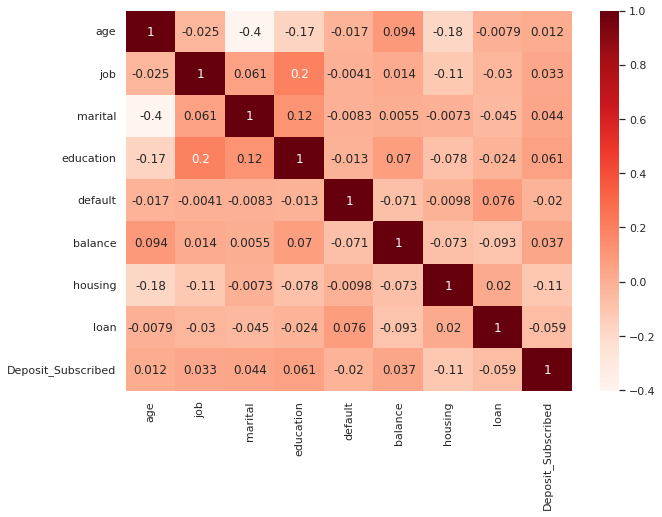

In [198]:
# Checking correlation 
plt.figure(figsize=(10,7))
ax = sns.heatmap(df1.corr(),annot=True,cmap='Reds') 

In [199]:
df2=df1.copy()

In [200]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,35,4,1,2,0,231,1,0,0
3,28,4,2,2,0,447,1,1,0
4,42,2,0,2,1,2,1,0,0


In [201]:
# Normalizing age and balance columns
from sklearn.preprocessing import MinMaxScaler
age_ar=df2['age'].values.reshape(-1,1)
balance_ar=df2['balance'].values.reshape(-1,1)
scaler=MinMaxScaler()
df2['age']=scaler.fit_transform(age_ar)
df2['balance']=scaler.fit_transform(balance_ar)

In [202]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,Deposit_Subscribed
0,0.519481,4,1,2,0,0.092259,1,0,0
1,0.337662,9,2,1,0,0.073067,1,0,0
2,0.220779,4,1,2,0,0.074901,1,0,0
3,0.129870,4,2,2,0,0.076862,1,1,0
4,0.311688,2,0,2,1,0.072822,1,0,0


In [203]:
# Splitting data into X and y
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =0) # test size to 25%
y_test

25487    0
30622    0
6155     0
5265     0
23997    0
        ..
33598    1
28918    0
14780    0
3426     0
11201    0
Name: Deposit_Subscribed, Length: 9301, dtype: int64

In [205]:
X_test

,age,job,marital,education,default,balance,housing,loan
25487,0.181818,7,1,0,0,0.074783,1,0
30622,0.389610,1,1,0,0,0.078641,1,0
6155,0.129870,1,1,1,0,0.066294,1,0
5265,0.194805,1,1,1,0,0.073357,1,0
23997,0.207792,4,1,2,0,0.075309,0,0
...,...,...,...,...,...,...,...,...
33598,0.467532,5,0,2,0,0.100730,0,0
28918,0.207792,2,1,2,0,0.082572,1,0
14780,0.155844,1,1,0,0,0.072186,1,0
3426,0.298701,1,1,0,0,0.074692,1,0


In [206]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting Model

In [207]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train) #machine learm from train data later do test data

LogisticRegression(random_state=0)

In [208]:
#Predict the test result on tested data set
y_pred = classifier.predict(X_test)
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [209]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
cm

array([[8306,    0],
       [ 995,    0]])

In [210]:
AccuracyScore = accuracy_score(y_test, y_pred)
AccuracyScore*100

89.30222556714332

In [211]:
model1=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.338988
         Iterations 7


In [212]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Deposit_Subscribed   No. Observations:                37201
Model:                          Logit   Df Residuals:                    37193
Method:                           MLE   Df Model:                            7
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:               0.0004485
Time:                        08:13:53   Log-Likelihood:                -12611.
converged:                       True   LL-Null:                       -12616.
Covariance Type:            nonrobust   LLR p-value:                    0.1254
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.7661      0.122    -14.523      0.000      -2.004      -1.528
job           -0.0188      0.005     -3.624      0.000      -0.029      -0.009
marital       -0.1820      0.026     -6.932      0.000      -0.233      -0.131
education      0.0158      0.025      0.631      0.528      -0.033       0.065
default       -0.6756      0.152     -4.455      0.000      -0.973      -0.378
balance       -8.2241      0.695    -11.831      0.000      -9.587      -6.862
housing       -0.9573      0.033    -29.043      0.000      -1.022      -0.893
loan          -0.7185      0.053    -13.582      0.000      -0.822      -0.615
==============================================================================
"""

Here Education p value is more than 0.5

In [213]:
pred1=model1.predict()
y_pred1 = list(map(round,pred1))

In [214]:
# Calculating RMSE 
from ml_metrics import rmse
rmse1=rmse(y,y_pred1)
print("RMSE for first model is:",rmse1)

RMSE for first model is: 0.32634722822983564


In [215]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1));

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     33239
           1       0.00      0.00      0.00      3962

    accuracy                           0.89     37201
   macro avg       0.45      0.50      0.47     37201
weighted avg       0.80      0.89      0.84     37201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model Rebuilding dropping education column and check accurtacy

In [ ]:
df3=df2.drop('education',axis=1)
df3.head()

In [217]:
# Splitting data into X and y
X=df3.iloc[:,:-1]
Y=df3.iloc[:,-1]

In [218]:
model2=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.338993
         Iterations 7


In [219]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Deposit_Subscribed   No. Observations:                37201
Model:                          Logit   Df Residuals:                    37194
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Aug 2022   Pseudo R-squ.:               0.0004327
Time:                        08:16:04   Log-Likelihood:                -12611.
converged:                       True   LL-Null:                       -12616.
Covariance Type:            nonrobust   LLR p-value:                   0.09092
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.7686      0.121    -14.572      0.000      -2.007      -1.531
job           -0.0180      0.005     -3.577      0.000      -0.028      -0.008
marital       -0.1792      0.026     -6.927      0.000      -0.230      -0.128
default       -0.6747      0.152     -4.449      0.000      -0.972      -0.377
balance       -8.0761      0.653    -12.372      0.000      -9.356      -6.797
housing       -0.9576      0.033    -29.061      0.000      -1.022      -0.893
loan          -0.7178      0.053    -13.572      0.000      -0.821      -0.614
==============================================================================
"""

all p values are less than 0.5

In [220]:
# Finding predicted values
pred2=model2.predict()
y_pred2 = list(map(round,pred2))


In [221]:
rmse2=rmse(Y,y_pred2)
print("RMSE for second model is:",rmse2)

RMSE for second model is: 0.32634722822983564


In [222]:
# Confusion Matrix for the model accuracy

confusion_matrix2 = confusion_matrix(Y,y_pred2)
accuracy_score2=accuracy_score(Y,y_pred2)
print(confusion_matrix2)
print("The accuracy score is:",accuracy_score2)

[[33239     0]
 [ 3962     0]]
The accuracy score is: 0.8934974866267036


Dropping Education column did not improve the accuracy score

#Accuracy of logistic regression model on the given data is 89.34% and RMSE is 32.63%. Still the datat is not balanced as we seen earlier that 89% data are labelled value 0 and 11% data labelled value 1 which means the data is biased towards 0. So that this model took precision in accuracy towards labelled 0 than 1. This can be used to predict for lable 0 in this dataset.